<table class="table table-bordered">
    <tr>
        <th style="width:200px;">
            <img src='https://bcgriseacademy.com/hs-fs/hubfs/RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png?width=3522&height=1986&name=RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png' style="background-color:black; width: 100%; height: 100%;">
        </th>
        <th style="text-align:center;">
            <h1>RISE2.0 Business and Data Analytics</h1>
            <h2>IU 3.7.2.1 Machine Learning Project</h2>
            <h3>Business Case 1 - Supervised Learning</h3>
        </th>
    </tr>
</table>

## Context

### Bank Customer Churn Prediction
Customer churn, also known as customer attrition, refers to the phenomenon whereby a customer ceases engagement with a company's services. Studies have shown that acquiring new customers can cost five times more than retaining existing customers. It is little wonder that banks are finding it increasingly important to track and retain existing customers. 

You are a data analyst working in one of the largest bank by assets in SEA. It is the largest payment bank in terms of transaction value. You are tasked to analyze and prevent customers portfolio attrition by creating a predictive model to identify customers with a higher propensity to churn, based on the customers' personal information and past history with the bank.

## Objectives
Based on what you have learnt in the course: 
1. Load the Bank Churn dataset and perform any necessary data preprocessing
2. Perform Exploratory Data Analysis (EDA) on the preprocessed dataset
3. Implement feature selection using suitable statistical techniques
4. Train, validate and evaluate a Supervised Learning model
5. Implement an optimal Supervised Learning model to address specific business needs

## Dataset

You are provided with the following files:
1. bank_churn.csv
2. Data Dictionary - Bank Churn.xlsx

### Step 1: Import Data and Perform Data Preprocessing [5 marks]

#### 1.1 Import packages

In [1]:
# Import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

#### 1.2 Load data into DataFrame

In [2]:
# Import bank churn dataset
df = pd.read_csv('Data/bank_churn.csv')

In [3]:
# Print first 5 rows
df.head()

,CID,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Print last 5 rows
df.tail()

,CID,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
9995,606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
# Check shape
df.shape

(10000, 12)

In [6]:
# Check dtypes
df.dtypes

CID                  int64
CreditScore          int64
Country             object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churned              int64
dtype: object

In [7]:
# Find duplicate rows across all columns
df[df.duplicated()]

,CID,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned


In [8]:
# Check for null values
print(df.isnull().sum().sum())

0


#### 1.3 Drop unnecessary column(s) and encode categorical variables (done after 1.4)

In [9]:
# Drop customer ID column
df.drop('CID', axis=1, inplace=True)

#### 1.4 Inspect each column using custom function 

In [10]:
# Create function for data inspection which will print the datatype, the number of missing values, the unique values, 
# the number of unique values and the value count of each unique value 

def data_inspector(df, start=0, stop=2):
    col_names = [i for i in df.columns]
    for index, col in enumerate(col_names[start:stop]):
        print(col, '\n')
        print(f'Datatype: {df[col].dtypes}', '\n')
        print(f'Number of missing values: {df[col].isna().sum()}', '\n')
        print(df[col].unique(), '\n')
        print(f'Number of unique values: {df[col].nunique()}', '\n')
        print(df[col].value_counts(), '\n')
        print('---BREAK---', '\n')
    

##### 1.4.1 CreditScore

In [11]:
data_inspector(df, start=0, stop=1)

CreditScore 

Datatype: int64 

Number of missing values: 0 

[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 5

##### 1.4.2 Country

In [12]:
data_inspector(df, start=1, stop=2)

Country 

Datatype: object 

Number of missing values: 0 

['France' 'Spain' 'Germany'] 

Number of unique values: 3 

Country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 

---BREAK--- 



**Note: Country should be One Hot Encoded before downstream modeling**

##### 1.4.3 Gender

In [13]:
data_inspector(df, start=2, stop=3)

Gender 

Datatype: object 

Number of missing values: 0 

['Female' 'Male'] 

Number of unique values: 2 

Gender
Male      5457
Female    4543
Name: count, dtype: int64 

---BREAK--- 



**Note: Gender should be One Hot Encoded before downstream modeling**

##### 1.4.4 Age

In [15]:
data_inspector(df, start=3, stop=4)

Age 

Datatype: int64 

Number of missing values: 0 

[42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83] 

Number of unique values: 70 

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64 

---BREAK--- 



##### 1.4.5 Tenure

In [16]:
data_inspector(df, start=4, stop=5)

Tenure 

Datatype: int64 

Number of missing values: 0 

[ 2  1  8  7  4  6  3 10  5  9  0] 

Number of unique values: 11 

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64 

---BREAK--- 



##### 1.4.6 Balance

In [17]:
data_inspector(df, start=5, stop=6)

Balance 

Datatype: float64 

Number of missing values: 0 

[     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79] 

Number of unique values: 6382 

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64 

---BREAK--- 



##### 1.4.7 NumOfProducts

In [18]:
data_inspector(df, start=6, stop=7)

NumOfProducts 

Datatype: int64 

Number of missing values: 0 

[1 3 2 4] 

Number of unique values: 4 

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64 

---BREAK--- 



**Note: NumOfProducts should be One Hot Encoded before downstream modeling since the cardinality is small and the feature cannot have continous values compared to 'Tenure'**

##### 1.4.8 HasCrCard

In [19]:
data_inspector(df, start=7, stop=8)

HasCrCard 

Datatype: int64 

Number of missing values: 0 

[1 0] 

Number of unique values: 2 

HasCrCard
1    7055
0    2945
Name: count, dtype: int64 

---BREAK--- 



##### 1.4.9 IsActiveMember

In [20]:
data_inspector(df, start=8, stop=9)

IsActiveMember 

Datatype: int64 

Number of missing values: 0 

[1 0] 

Number of unique values: 2 

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64 

---BREAK--- 



##### 1.4.10 EstimatedSalary

In [21]:
data_inspector(df, start=9, stop=10)

EstimatedSalary 

Datatype: float64 

Number of missing values: 0 

[101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78] 

Number of unique values: 9999 

EstimatedSalary
24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: count, Length: 9999, dtype: int64 

---BREAK--- 



##### 1.4.11 Churned

In [22]:
data_inspector(df, start=10, stop=11)

Churned 

Datatype: int64 

Number of missing values: 0 

[1 0] 

Number of unique values: 2 

Churned
0    7963
1    2037
Name: count, dtype: int64 

---BREAK--- 



**Note: Some class imbalance is evident.**

#### 1.5 Encode categorical variables

In [23]:
# Get dummies for specified columns
df_dummies = pd.get_dummies(df, columns=['Country', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'], drop_first=True)

# Display the result
df_dummies.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Churned,Country_Germany,Country_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,101348.88,1,False,False,False,False,False,False,True,True
1,608,41,1,83807.86,112542.58,0,False,True,False,False,False,False,False,True
2,502,42,8,159660.80,113931.57,1,False,False,False,False,True,False,True,False
3,699,39,1,0.00,93826.63,0,False,False,False,True,False,False,False,False
4,850,43,2,125510.82,79084.10,0,False,True,False,False,False,False,True,True


### Step 2: Perform EDA on the dataset [10 marks]

#### 2.1 Check correlation of variables

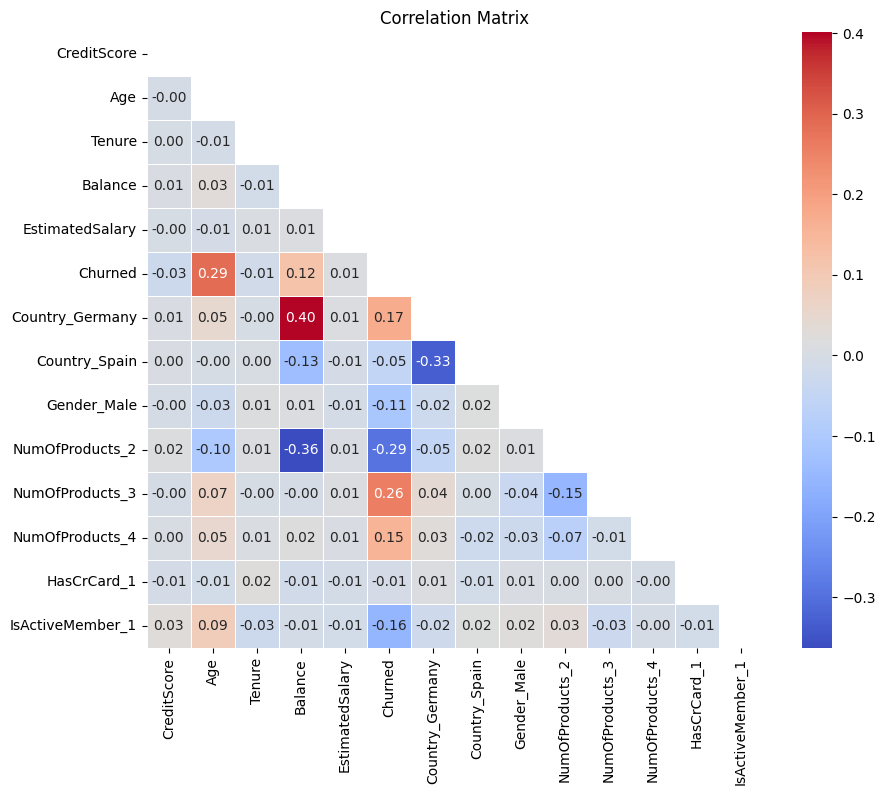

In [24]:
# Compute the correlation matrix
corr_matrix = df_dummies.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

In [25]:
# Set a correlation threshold and remove unnecessary features (if any)

# Calculate absolute correlation values
corr_matrix = df_dummies.corr().abs()

# Set correlation threshold (can be modified)
threshold = 0.7

# Find index of feature columns with correlation greater than threshold
high_corr_features = np.where(corr_matrix > threshold)
high_corr_features = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]

if not high_corr_features:
    print("No columns dropped due to high correlation.")
else:
    # Drop highly correlated features
    for feat1, feat2 in high_corr_features:
        if feat1 in df_dummies.columns and feat2 in df_dummies.columns:
            # Drop one of the correlated features
            print(f"Dropping {feat2} due to high correlation with {feat1}")
            df_dummies.drop(feat2, axis=1, inplace=True)

No columns dropped due to high correlation.


#### 2.2 Check VIF of variables and drop necessary columns

In [26]:
# Explore Variance Inflation Factor (VIF)

# Convert boolean columns to numeric (1 for True, 0 for False)
df_dummies_numeric = df_dummies.astype(int)

# Calculate VIF for all columns in df_dummies
vif_data = pd.DataFrame()
vif_data["Feature"] = df_dummies_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_dummies_numeric.values, i) for i in range(df_dummies_numeric.shape[1])]

# Display the VIF dataframe
vif_data

,Feature,VIF
0,CreditScore,0.131648
1,Age,13.486819
2,Tenure,3.857397
3,Balance,-0.000025
4,EstimatedSalary,-0.000015
5,Churned,1.698393
6,Country_Germany,1.830892
7,Country_Spain,1.486011
8,Gender_Male,2.191490
9,NumOfProducts_2,2.298087


**Although VIF cannot be -ve, the presence of slight negative values in VIF for Balance and EstimatedSalary is likely due to numerical precision issues rather than actual negative multicollinearity.**

In [27]:
# Drop columns where VIF > VIF threshold

# Set your VIF threshold
vif_threshold = 5

# Identify features with high VIF
high_vif_features = vif_data[vif_data['VIF'] > vif_threshold]['Feature']

# Print the columns being dropped
print("Columns dropped due to high VIF:")
print(high_vif_features)

# Drop columns from df_dummies
df_dummies.drop(columns=high_vif_features, inplace=True)

Columns dropped due to high VIF:
1    Age
Name: Feature, dtype: object


**Age column has been dropped due to exceeding the VIF threshold.**

#### 2.3 Check for outliers and drop rows if necessary

In [28]:
# Get Summary statistics
df_dummies.drop(columns=['Churned']).describe()

,CreditScore,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,5.012800,76485.889288,100090.239881
std,96.653299,2.892174,62397.405202,57510.492818
min,350.000000,0.000000,0.000000,11.580000
25%,584.000000,3.000000,0.000000,51002.110000
50%,652.000000,5.000000,97198.540000,100193.915000
75%,718.000000,7.000000,127644.240000,149388.247500
max,850.000000,10.000000,250898.090000,199992.480000


In [29]:
# Select numerical columns
numerical_columns = ['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary']

# Calculate quartiles and IQR
Q1 = df_dummies[numerical_columns].quantile(0.25)
Q3 = df_dummies[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outliers boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = {}
for col in numerical_columns:
    outliers[col] = df_dummies[(df_dummies[col] < lower_bound[col]) | (df_dummies[col] > upper_bound[col])][col]

# Print outliers
for col, values in outliers.items():
    if not values.empty:
        print(f"Outliers in {col}:")
        print(values)

Outliers in CreditScore:
7       376
942     376
1193    363
1405    359
1631    350
1838    350
1962    358
2473    351
2579    365
8154    367
8723    350
8762    350
9210    382
9356    373
9624    350
Name: CreditScore, dtype: int64


In [30]:
# Flatten the index values from outliers dictionary
outlier_indices = [index for indices in outliers.values() for index in indices.index]

# Remove outliers from df_dummies
df_dummies_no_outliers = df_dummies.drop(outlier_indices)

#### 2.4 Feature Engineering

In [33]:
# Create new features using the df_dummies_no_outliers DataFrame

# The Balance_to_Salary ratio provides a sense of financial stability or liquidity,
# indicating how well the account holder's balance aligns with their salary.
df_dummies_no_outliers['Balance_to_Salary'] = df_dummies_no_outliers['Balance'] / df_dummies_no_outliers['EstimatedSalary']

# The CreditScore_Tenure interaction term captures the combined effect of creditworthiness and 
# customer loyalty, providing insights into long-term financial behavior.
df_dummies_no_outliers['CreditScore_Tenure'] = df_dummies_no_outliers['CreditScore'] * df_dummies_no_outliers['Tenure']

# HighBalance is a binary feature indicating whether an account holder's balance is above the median.
# This helps distinguish customers with relatively higher balances.
df_dummies_no_outliers['HighBalance'] = (df_dummies_no_outliers['Balance'] > df_dummies_no_outliers['Balance'].median()).astype(int)

# Get dummies for specified columns
df_dummies_no_outliers = pd.get_dummies(df_dummies_no_outliers, columns=['HighBalance'], drop_first=True)

# Display the result
df_dummies_no_outliers.head()

,CreditScore,Tenure,Balance,EstimatedSalary,Churned,Country_Germany,Country_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1,Balance_to_Salary,CreditScore_Tenure,HighBalance_1
0,619,2,0.00,101348.88,1,False,False,False,False,False,False,True,True,0.000000,1238,False
1,608,1,83807.86,112542.58,0,False,True,False,False,False,False,False,True,0.744677,608,False
2,502,8,159660.80,113931.57,1,False,False,False,False,True,False,True,False,1.401375,4016,True
3,699,1,0.00,93826.63,0,False,False,False,True,False,False,False,False,0.000000,699,False
4,850,2,125510.82,79084.10,0,False,True,False,False,False,False,True,True,1.587055,1700,True


#### 2.5 Visualize Churn

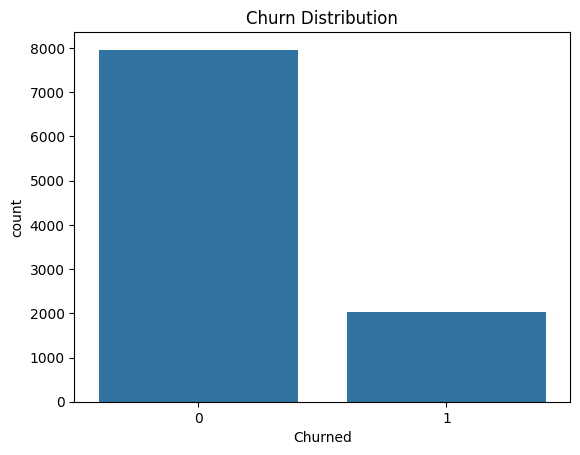

In [34]:
# Visualize the distribution of churn
sns.countplot(x='Churned', data=df)
plt.title('Churn Distribution')
plt.show()

**Preferable to handle class imbalance using SMOTE.**

#### 2.6 Perform train-test split of data

In [35]:
# Set "Churned" as target feature and the rest as input features
X = df_dummies_no_outliers.drop('Churned', axis=1)
y = df_dummies_no_outliers['Churned']

In [36]:
# Convert boolean columns to numeric (0 or 1)
boolean_columns = ['Country_Germany', 'Country_Spain', 'Gender_Male', 'NumOfProducts_2',
                   'NumOfProducts_3', 'NumOfProducts_4', 'HasCrCard_1', 'IsActiveMember_1', 'HighBalance_1'
                  ]
X[boolean_columns] = X[boolean_columns].astype(int)

# Display the new DataFrame
X

,CreditScore,Tenure,Balance,EstimatedSalary,Country_Germany,Country_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1,Balance_to_Salary,CreditScore_Tenure,HighBalance_1
0,619,2,0.00,101348.88,0,0,0,0,0,0,1,1,0.000000,1238,0
1,608,1,83807.86,112542.58,0,1,0,0,0,0,0,1,0.744677,608,0
2,502,8,159660.80,113931.57,0,0,0,0,1,0,1,0,1.401375,4016,1
3,699,1,0.00,93826.63,0,0,0,1,0,0,0,0,0.000000,699,0
4,850,2,125510.82,79084.10,0,1,0,0,0,0,1,1,1.587055,1700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,5,0.00,96270.64,0,0,1,1,0,0,1,0,0.000000,3855,0
9996,516,10,57369.61,101699.77,0,0,1,0,0,0,1,1,0.564108,5160,0
9997,709,7,0.00,42085.58,0,0,0,0,0,0,0,1,0.000000,4963,0
9998,772,3,75075.31,92888.52,1,0,1,1,0,0,1,0,0.808230,2316,0


In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

### Step 3: Train and Finetune the Models [15 marks]

#### 3.1 Model 1 - Create Classification Model

In [38]:
# Model Building
# Create an instance of a classification model (e.g. LogisticRegression, DecisionTreeClassifier etc)

In [39]:
# Define the preprocessing for numerical features
numerical_features = ['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary', 'Balance_to_Salary', 'CreditScore_Tenure']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define the preprocessing for categorical features
# categorical_features = []
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# Define passthrough features
passthrough_features = ['Country_Germany', 'Country_Spain', 'Gender_Male', 
                        'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4', 
                        'HasCrCard_1', 'IsActiveMember_1', 'HighBalance_1']

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        # ('cat', categorical_transformer, categorical_features),
        ('passthrough', 'passthrough', passthrough_features)
    ])

# Define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Define SMOTE pipeline with LogisticRegression
smote_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(sampling_strategy='auto',
                    random_state=42)),
    ('model_pipeline', model_pipeline)
])

In [40]:
# Define parameter grid for Logistic Regression
alphas = np.logspace(-1, -3, 100)
log_reg_param_grid = {
    'model_pipeline__classifier__C': alphas,
    'model_pipeline__classifier__penalty': ['l1', 'l2']
}

In [41]:
# Use GridSearchCV to find the optimal hyperparameters
grid_search_log_reg  = GridSearchCV(smote_pipeline, log_reg_param_grid, scoring='f1', cv=10)

In [42]:
# Fit the model on training datasets
grid_search_log_reg.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('model_pipeline',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('scaler',
                                                                                                           StandardScaler())]),
                                                                                          ['CreditScore',
                                                                                           'Tenure',
                                                                                           'Balance',
                                                                                           'EstimatedSalary',
                                                                                           'Balance_to_Salary',
                                                                                           'CreditScore_Tenure']),
                                                                                         ('passthrough',
                                                                                          'passthrough',
                                                                                          ['Country_Ger...
       0.00385353, 0.00367838, 0.00351119, 0.0033516 , 0.00319927,
       0.00305386, 0.00291505, 0.00278256, 0.00265609, 0.00253536,
       0.00242013, 0.00231013, 0.00220513, 0.0021049 , 0.00200923,
       0.00191791, 0.00183074, 0.00174753, 0.0016681 , 0.00159228,
       0.00151991, 0.00145083, 0.00138489, 0.00132194, 0.00126186,
       0.0012045 , 0.00114976, 0.0010975 , 0.00104762, 0.001     ]),
                         'model_pipeline__classifier__penalty': ['l1', 'l2']},
             scoring='f1')

In [43]:
# Retrieve the best parameters
grid_search_log_reg.best_params_

{'model_pipeline__classifier__C': 0.1,
 'model_pipeline__classifier__penalty': 'l2'}

In [44]:
# Initialize and train the model with the best parameters
smote_pipeline.set_params(**grid_search_log_reg.best_params_).fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('model_pipeline',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    StandardScaler())]),
                                                                   ['CreditScore',
                                                                    'Tenure',
                                                                    'Balance',
                                                                    'EstimatedSalary',
                                                                    'Balance_to_Salary',
                                                                    'CreditScore_Tenure']),
                                                                  ('passthrough',
                                                                   'passthrough',
                                                                   ['Country_Germany',
                                                                    'Country_Spain',
                                                                    'Gender_Male',
                                                                    'NumOfProducts_2',
                                                                    'NumOfProducts_3',
                                                                    'NumOfProducts_4',
                                                                    'HasCrCard_1',
                                                                    'IsActiveMember_1',
                                                                    'HighBalance_1'])])),
                                 ('classifier',
                                  LogisticRegression(C=0.1,
                                                     solver='liblinear'))]))])

In [45]:
# Compute predictions on training and testing sets
y_train_pred = smote_pipeline.predict(X_train)
y_test_pred = smote_pipeline.predict(X_test)

In [46]:
# Evaluate the model using suitable metrics (e.g. accuracy, F1 score etc)

# Training set evaluation
print("Training Set Evaluation:")
print("Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))

# Testing set evaluation
print("\nTesting Set Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))

Training Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      7166
           1       0.42      0.60      0.50      1820

    accuracy                           0.75      8986
   macro avg       0.65      0.70      0.67      8986
weighted avg       0.79      0.75      0.77      8986

Confusion Matrix:
[[5665 1501]
 [ 723 1097]]
Accuracy: 0.7525038949476964
Precision: 0.422247882986913
Recall: 0.6027472527472527
F1 Score: 0.49660479855138073

Testing Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       797
           1       0.42      0.61      0.50       202

    accuracy                           0.75       999
   macro avg       0.66      0.70      0.67       999
weighted avg       0.80      0.75      0.77       999

Confusion Matrix:
[[629 168]
 [ 78 124]]
Accuracy: 0.7537537537537538
Precision: 0.4246575

#### 3.2 Model 2 - Create Logit model using statsmodel

In [47]:
# Add intercept term to X
X_with_constant = sm.add_constant(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_constant, y, test_size=0.1, random_state=42, stratify=y)

In [48]:
# Fit logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()  

# Print summary of the model
result.summary()

         Current function value: 0.403956
         Iterations: 35


C:\Users\Wes\anaconda3\envs\AIAP16\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Churned   No. Observations:                 8986
Model:                          Logit   Df Residuals:                     8970
Method:                           MLE   Df Model:                           15
Date:                Sat, 27 Jul 2024   Pseudo R-squ.:                  0.1983
Time:                        08:38:43   Log-Likelihood:                -3630.0
converged:                      False   LL-Null:                       -4528.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2041      0.411      0.496      0.620      -0.602       1.010
CreditScore           -0.0010      0.001     -1.707      0.088      -0.002       0.000
Tenure                -0.1048      0.069     -1.509      0.131      -0.241       0.031
Balance            -1.936e-06   1.01e-06     -1.926      0.054   -3.91e-06    3.45e-08
EstimatedSalary     7.954e-07   5.26e-07      1.513      0.130   -2.35e-07    1.83e-06
Country_Germany        0.9768      0.073     13.406      0.000       0.834       1.120
Country_Spain          0.0624      0.077      0.809      0.419      -0.089       0.213
Gender_Male           -0.5143      0.059     -8.660      0.000      -0.631      -0.398
NumOfProducts_2       -1.6210      0.074    -22.027      0.000      -1.765      -1.477
NumOfProducts_3        2.5053      0.180     13.917      0.000       2.153       2.858
NumOfProducts_4       17.7380    584.087      0.030      0.976   -1127.051    1162.527
HasCrCard_1           -0.0730      0.065     -1.128      0.259      -0.200       0.054
IsActiveMember_1      -0.8383      0.061    -13.832      0.000      -0.957      -0.720
Balance_to_Salary      0.0022      0.001      1.919      0.055    -4.7e-05       0.004
CreditScore_Tenure     0.0001      0.000      1.251      0.211    -7.5e-05       0.000
HighBalance_1          0.1475      0.114      1.293      0.196      -0.076       0.371
======================================================================================
"""

#### 3.3 Drop variables with high p-values

Here are the features with high p-values (> 0.05):

1. **CreditScore**: p-value = 0.088
2. **Tenure**: p-value = 0.131
3. **Balance**: p-value = 0.054
4. **EstimatedSalary**: p-value = 0.130
5. **Country_Spain**: p-value = 0.419
6. **HasCrCard_1**: p-value = 0.259
7. **Balance_to_Salary**: p-value = 0.055
8. **CreditScore_Tenure**: p-value = 0.211
9. **HighBalance_1**: p-value = 0.196

These variables have p-values greater than 0.05, indicating that they are not statistically significant at the conventional significance level (typically α = 0.05). In logistic regression, variables with high p-values can potentially be removed from the model to simplify it and improve its interpretability and predictive performance.

In [67]:
# Drop variables with high p-value

# Remove non-significant variables from X_converted
X_reduced = X.drop(columns=['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary', 'Country_Spain', 'HasCrCard_1', 'Balance_to_Salary',
                           'CreditScore_Tenure', 'HighBalance_1'])

#### 3.4 Create a second classification model using updated data

In [69]:
# Create second instance of selected classification model using updated data

# Define passthrough features
passthrough_features = ['Country_Germany', 'Gender_Male', 'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4', 'IsActiveMember_1']

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('passthrough', 'passthrough', passthrough_features)
    ])

# Define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Define SMOTE pipeline with LogisticRegression
smote_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(sampling_strategy='auto',
                    random_state=42)),
    ('model_pipeline', model_pipeline)
])

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.1, random_state=42, stratify=y)

In [71]:
# Define parameter grid for Logistic Regression
alphas = np.logspace(-1, -3, 100)
log_reg_param_grid = {
    'model_pipeline__classifier__C': alphas,
    'model_pipeline__classifier__penalty': ['l1', 'l2']
}

# Use GridSearchCV to find the optimal hyperparameters
grid_search_log_reg  = GridSearchCV(smote_pipeline, log_reg_param_grid, scoring='f1', cv=10)

# Fit the model on training datasets
grid_search_log_reg.fit(X_train, y_train)

# Retrieve the best parameters
grid_search_log_reg.best_params_

{'model_pipeline__classifier__C': 0.0011497569953977356,
 'model_pipeline__classifier__penalty': 'l2'}

In [72]:
# Initialize and train the model with the best parameters
smote_pipeline.set_params(**grid_search_log_reg.best_params_).fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('model_pipeline',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('passthrough',
                                                                   'passthrough',
                                                                   ['Country_Germany',
                                                                    'Gender_Male',
                                                                    'NumOfProducts_2',
                                                                    'NumOfProducts_3',
                                                                    'NumOfProducts_4',
                                                                    'IsActiveMember_1'])])),
                                 ('classifier',
                                  LogisticRegression(C=0.0011497569953977356,
                                                     solver='liblinear'))]))])

In [73]:
# Compute predictions on training and testing sets
y_train_pred = smote_pipeline.predict(X_train)
y_test_pred = smote_pipeline.predict(X_test)

In [74]:
# Evaluate the second model using suitable metrics (e.g. accuracy, F1 score etc)

# Training set evaluation
print("Training Set Evaluation:")
print("Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))

# Testing set evaluation
print("\nTesting Set Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))

Training Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      7166
           1       0.40      0.69      0.51      1820

    accuracy                           0.73      8986
   macro avg       0.65      0.72      0.66      8986
weighted avg       0.80      0.73      0.75      8986

Confusion Matrix:
[[5305 1861]
 [ 562 1258]]
Accuracy: 0.7303583351880704
Precision: 0.4033344020519397
Recall: 0.6912087912087912
F1 Score: 0.5094148613079571

Testing Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       797
           1       0.39      0.66      0.49       202

    accuracy                           0.72       999
   macro avg       0.64      0.70      0.65       999
weighted avg       0.79      0.72      0.75       999

Confusion Matrix:
[[589 208]
 [ 68 134]]
Accuracy: 0.7237237237237237
Precision: 0.3918128

### Step 4: Perform Model Validation and Evaluation [5 marks]

#### 4.1 Check model performance using cross validation

**The below steps seem superfluous given that the model pipeline I have used already includes cross-validation using GridSearchCV with the hyperparameter, cv=10. For purposes of following the assessment guidelines, I have used cross_val_score for the second classification model.**

In [75]:
# Perform K-fold cross validation on second classification model

# Perform cross-validation with 10 folds
cv_scores = cross_val_score(smote_pipeline, X_reduced, y, cv=10, scoring='accuracy')

In [76]:
# Display mean training accuracy of cross validation

# Print cross-validation scores
print("Cross-Validation Scores (Accuracy):")
print(cv_scores)

# Calculate and print average score
print(f"\nAverage Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores (Accuracy):
[0.72972973 0.73173173 0.73073073 0.69169169 0.72272272 0.7254509
 0.69739479 0.73847695 0.73847695 0.70440882]

Average Accuracy: 0.7211


In [77]:
# Display standard deviation of training accuracy of cross validation

# Print standard deviation of training accuracy
print("Standard Deviation of Training Accuracy:")
print(cv_scores.std())

Standard Deviation of Training Accuracy:
0.01615894583428169


#### 4.2 Evaluate model performance using Confusion Matrix

**The below steps seem superfluous given that I have provided both the confusion matrix and classification report for both models (with all features, and with high p-value features dropped) in Step 3**

In [78]:
# Generate Confusion Matrix

# Perform cross-validation predictions
y_pred = cross_val_predict(smote_pipeline, X_reduced, y, cv=10)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5778 2185]
 [ 600 1422]]


In [79]:
# Create classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      7963
           1       0.39      0.70      0.51      2022

    accuracy                           0.72      9985
   macro avg       0.65      0.71      0.66      9985
weighted avg       0.80      0.72      0.74      9985



### What is the issue with your current model?

**Model 1:**

**Features**:
- CreditScore
- Tenure
- Balance
- EstimatedSalary
- Country_Germany
- Country_Spain
- Gender_Male
- NumOfProducts_2
- NumOfProducts_3
- NumOfProducts_4
- HasCrCard_1
- IsActiveMember_1
- Balance_to_Salary
- CreditScore_Tenure
- HighBalance_1

**Training Performance**:
- **Accuracy**: 75.3%
- **Precision**: 42.2%
- **Recall**: 60.3%
- **F1 Score**: 49.7%

**Testing Performance**:
- **Accuracy**: 75.4%
- **Precision**: 42.5%
- **Recall**: 61.4%
- **F1 Score**: 50.2%

**Model 2:**

**Features**:
- Same as Model 1 but excluding 'CreditScore', 'Tenure', 'Balance', 'EstimatedSalary', 'Country_Spain', 'HasCrCard_1', 'Balance_to_Salary',
                           'CreditScore_Tenure', 'HighBalance_1' due to high p-values

**Training Performance**:
- **Accuracy**: 73.0%
- **Precision**: 40.3%
- **Recall**: 69.1%
- **F1 Score**: 50.9%

**Testing Performance**:
- **Accuracy**: 72.4%
- **Precision**: 39.2%
- **Recall**: 66.3%
- **F1 Score**: 49.3%

**Comparison and Issues:**

1. **Accuracy**: Model 1 has higher accuracy than Model 2 (75.3% vs. 73.0% in training and 75.4% vs. 72.4% in testing), indicating the removal of features slightly impacted overall accuracy.
2. **Precision**: Model 1 slightly outperforms Model 2 in precision (42.2% vs. 40.3% in training and 42.5% vs. 39.2% in testing), indicating that Model 1 has a better ability to avoid false positives.
3. **Recall**: Model 2 has a better recall than Model 1 (69.1% vs. 60.3% in training and 66.3% vs. 61.4% in testing), suggesting Model 2 is better at identifying true positives.
4. **F1 Score**: Model 2 has a higher F1 score in training (50.9% vs. 49.7%), but Model 1 has a higher F1 score in testing (50.2% vs. 49.3%), indicating a trade-off between precision and recall.
5. **Confusion Matrix**: Model 2 has fewer false negatives (562 vs. 723 in training and 68 vs. 78 in testing), but more false positives (1861 vs. 1501 in training and 208 vs. 168 in testing), highlighting the trade-off between recall and precision.

**Possible Issues**

1. **Model 2 Bias**: Removing features with high p-values might have introduced bias, leading to better recall but worse precision.
2. **Feature Importance**: Model 1's features with high p-values might still contribute to model performance. Their removal might degrade certain aspects of the model's predictive power.
3. **Data Imbalance**: Both models show lower performance for the minority class (churn), indicating potential issues with data imbalance. 

**Conclusion**: Overall, while Model 2 shows better recall, the choice between models depends on whether precision or recall is more critical for the application. Further adjusting for data imbalance and exploring other feature engineering techniques might further improve performance.

### Step 5: Recommend possible steps to enhance your model performance. [5 marks]

#### List of recommendations

**Recommendations to Enhance Model Performance**

As I have already used SMOTE to account for data imbalance by oversampling the minority class, and have also applied feature engineering to create new features, but the model's performance for the minority class (churn) is still low, then the following steps can be considered:

1. **Model Complexity**: Use more complex models like ensemble methods (e.g., Random Forest, Gradient Boosting) to improve performance through techniques like bagging or boosting.

2. **Feature Engineering**: Revisit feature engineering to create better predictive features.

3. **Data Quality**: Check for issues with data quality, such as noise or outliers.

4. **Evaluation Metrics**: Use metrics like AUC-ROC or precision-recall curves specifically for the minority class.

5. **Hyperparameter Tuning**: Optimize hyperparameters with more time-consuming and computationally extensive techniques like random search.

6. **Class Weight Adjustment**: Incorporating cost-sensitive learning to penalize misclassification of the minority class more heavily by adjusting class weights in the model to give more importance to the minority class. E.g. The `class_weight='balanced'` hyperparameter for LogisticRegression adjusts the weights inversely proportional to class frequencies in the input data.

7. **Additional Data**: If possible, gather more data to help the model learn better patterns, especially for the minority class.

8. **Anomaly Detection**: Implement anomaly detection methods to handle outliers that may affect model performance.


End of Document